# Onboard a model defined in a .wf1 file
This notebook takes a .wf1 workfile and transform  it to a modelflow model.<br>

The overall process is performed in a Dataclass named:**GrapWfModel**<br> 
Close study of this class can be rewarding, but is outside the need of most users.<br>
The overall structure is: 
 1. Eviews is started and the wf1 (or wf2) file is loaded
    -    Some transformations are performed on data.
    -    The model is unlinked 
    -    The workspace is saved as a wf2 file. Same name with ```_modelflow appended```
 5. Eviews is closed 
 6. The wf2 file is read as a json file. 
 7. Relevant objects are extracted. 
 7. The MFMSA variable is  extracted, to be saved in the dumpfile. 
 8. The equations are transformed and normalized to modelflow format and classified into identities and stochastic
 9. Stochastic equations are enriched by add_factor and fixing terms (dummy + fixing value)  
 9. For Stochastic equations new fitted variables are generated - without add add_factors and dummies.  
 9. A model to generate fitted variables is created  
 9. A model to generate add_factors is created. 
 9. A model encompassing the original equations, the model for fitted variables and for add_factors is created. 
 9. The data series and scalars are shoveled into a Pandas dataframe 
     - Some special series are generated as the expression can not be incorporated into modelflow model specifications
     - The model for fitted values is simulated in the specified timespan
     - The model for add_factors is simulated in the timespan set in MFMSA
 10. The data descriptions are extracted into a dictionary. 
    - Data descriptions for dummies, fixed values, fitted values and add_factors are derived. 
 11. Now we have a model and a dataframe with all variables which are needed.
 b
The GrapWfModel instance in general keeps most of the steps so the developer can inspect the the different steps.  


## Prerequisites  

- Eviews version 12 
- The python library: ```pyevies```  


In [1]:
%matplotlib Notebook

In [2]:
from pathlib import Path

from modelclass import model
from modelgrabwf2 import GrabWfModel
model.widescreen()

## Model specific transformations 
Not all Eviews equations have a direct counterpart in modelflow.<br>
To handle that two types of transformations can be provided for a specific model. 
- **eviews_run_lines** which specifies a list of Eviews command lines to be run. Typical to make some transformation of data which is not possible in modelflow. 
- **country_trans** which specifies a list of replacements to be done to the Eviews formulas before they are processed to modelflow. Typical to use the transformation mentioned above.  

In [3]:
filename = Path('../data/KENmod20230629.wf1')              
modelname = 'ken'

## Process the model

In [4]:
all_about_ken = GrabWfModel(filename, 
                    make_fitted = False,       # If we want to calculate a fittet value for stocastic eq 
                    do_add_factor_calc=True,   # Stocastic equations are argumented by add factor 
                    start = 2022,
                    end = 2100, 
                    fit_start = 2000,          # Start of calculation of fittet model in baseline 
                    fit_end   = 2030           # end of calc for fittted model, if None taken from mdmfsa options  
                    ) 


Reading c:\wb ftt\code\FTT-ModelFlow\FTT_modelflow\models\FTT flex modelflow\..\data\KENmod20230629.wf1
Assummed model name: KEN
The model: KEN is unlinked 
Writing C:\wb ftt\code\FTT-ModelFlow\FTT_modelflow\models\data\KENmod20230629_modelflow.wf2
Model name: KEN

Processing the model:KEN
Estimated coifficients are substituted


Normalizing model: 100%|██████████████████████████████████████████████████████████████████████████████████████████████|198/198


Default WB var_group loaded
Variable description in wf1 file read
Default WB var_description loaded
Calculation of add factors for KEN calculated  


## Check if each equation on its own result in the values provided. 
aka: residual check <br> 
If they are not pretty close, something is very wrong. 

In [5]:
all_about_ken.test_model(all_about_ken.start,all_about_ken.end,maxerr=100,tol=0.01,showall=1)

KEN calculated  

Chekking residuals for KEN 2022 to 2100

Variable with residuals above threshold
KENNYGDPPOTLKN              , Max difference:245893.94761621 Max Pct    0.4020175799% It is number    31 in the solveorder and error number 1
FRML <IDENT> KENNYGDPPOTLKN = (KENPSTAR*KENTTLOUTKN-KENINDELECXN*KENINDELECQN)/KENCOBDOUGXN $

Result of equation 
             Before check   After calculation         Difference           Pct
2022  9737079.9099154398  9735274.0958987195   -1805.8140167203 -0.0185457451
2023 10087069.8081041407 10079195.8205029573   -7873.9876011834 -0.0780602073
2024 10627458.3868375272 10616868.7327825669  -10589.6540549602 -0.0996442768
2025 11227038.8472202178 11215888.7207348533  -11150.1264853645 -0.0993149364
2026 11905809.8205105606 11895946.8645921331   -9862.9559184276 -0.0828415376
2027 12677719.6472183503 12672653.8420918081   -5065.8051265422 -0.0399583306
2028 13545497.4826765414 13545509.9914226253      12.5087460838  0.0000923462
2029 14508246.06744

## Extract the model and the baseline
**all_about_ken** has a lot of content including. 
- .mmodel is the model instance
- .base_input is the baseline where the add factors and the fitted values are calculated 

In [6]:
mken,baseline      = all_about_ken()     

## Run the model 
In order to achieve numerical stability Gauss-Seidle has to be dampened: alfa=0.7 makes sure that the solution does not explode. 
The convergence criteria is tightend a lot. 

In [7]:
res = mken(baseline,2023,2050,silent=0,alfa = 0.5)

Will start solving: KEN
Reusing the solver as no new data 
now makelos makes a sim solvefunction
2023 Solved in 74 iterations
2024 Solved in 80 iterations
2025 Solved in 90 iterations
2026 Solved in 83 iterations
2027 Solved in 78 iterations
2028 Solved in 76 iterations
2029 Solved in 74 iterations
2030 Solved in 72 iterations
2031 Solved in 69 iterations
2032 Solved in 67 iterations
2033 Solved in 66 iterations
2034 Solved in 65 iterations
2035 Solved in 64 iterations
2036 Solved in 63 iterations
2037 Solved in 62 iterations
2038 Solved in 61 iterations
2039 Solved in 81 iterations
2040 Solved in 85 iterations
2041 Solved in 88 iterations
2042 Solved in 90 iterations
2043 Solved in 83 iterations
2044 Solved in 82 iterations
2045 Solved in 85 iterations
2046 Solved in 85 iterations
2047 Solved in 86 iterations
2048 Solved in 68 iterations
2049 Solved in 83 iterations
2050 Solved in 81 iterations
KEN solved  


## And the simulation result is also fine. 
Here the percent difference is displayed

In [8]:
mken['*GGEXPCAPTCN *NYGDPMKTPCN *GGDBTTOTLCN *BNCABFUNDCD KENTOTELECQN KENNYGDPPOTLKN']

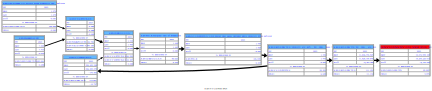

In [9]:
with mken.set_smpl(2023,2023):
    mken.KENNYGDPMKTPCN.tracepre(filter=20,up=7,sd=True,ats=True,browser=1) 

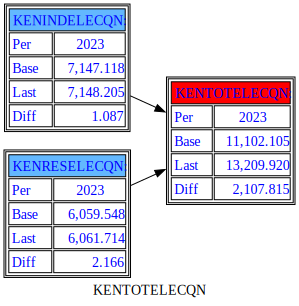

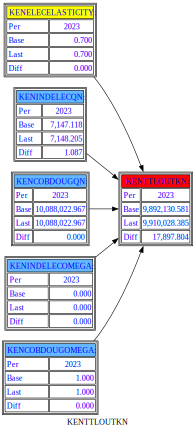

In [10]:
with mken.set_smpl(2023,2023):

    mken.KENTOTELECQN.tracepre(sd=True) 
    mken.KENTTLOUTKN.tracepre(sd=True)                 

## Look at a stochastic variable 
Here the equations undergo more phases 

In [11]:
all_about_ken.all_frml_dict['KENGGEXPCAPTCN'].fprint


Endo_var        : KENGGEXPCAPTCN
Original        : DLOG(KENGGEXPCAPTCN)=-0.169741292945079*(LOG(KENGGEXPCAPTCN(-1))-LOG(KENNYGDPMKTPCN(-1))-LOG(0.0695471984012515))+0.178981111257331*DLOG(KENGGEXPCAPTCN(-1))+(1-0.178981111257331)*DLOG(KENNYGDPMKTPCN)
Preprocessed    : ((LOG(KENGGEXPCAPTCN))-(LOG(KENGGEXPCAPTCN(-1))))=-0.169741292945079*(LOG(KENGGEXPCAPTCN(-1))-LOG(KENNYGDPMKTPCN(-1))-LOG(0.0695471984012515))+0.178981111257331*((LOG(KENGGEXPCAPTCN(-1)))-(LOG(KENGGEXPCAPTCN(-2))))+(1-0.178981111257331)*((LOG(KENNYGDPMKTPCN))-(LOG(KENNYGDPMKTPCN(-1))))
Normalized      : KENGGEXPCAPTCN = (KENGGEXPCAPTCN(-1)*EXP(KENGGEXPCAPTCN_A+ (-0.169741292945079*(LOG(KENGGEXPCAPTCN(-1))-LOG(KENNYGDPMKTPCN(-1))-LOG(0.0695471984012515))+0.178981111257331*((LOG(KENGGEXPCAPTCN(-1)))-(LOG(KENGGEXPCAPTCN(-2))))+(1-0.178981111257331)*((LOG(KENNYGDPMKTPCN))-(LOG(KENNYGDPMKTPCN(-1))))) )) * (1-KENGGEXPCAPTCN_D)+ KENGGEXPCAPTCN_X*KENGGEXPCAPTCN_D 
Calc_add_factor : KENGGEXPCAPTCN_A = - ((-0.169741292945079*(LOG(

## Look a all the modelflow frmls
Notice after the "original" model the equations for the "fitted" values have been added. <br>
Also in the end of the listing the specification of the model which calculates the add factors if a variable is fixed. When processing the equations the ```model``` class will process this this model separately and create a model instance 
which is used to calculate add factors in case 

In [12]:
print(mken.equations)

FRML <IDENT> KENBFBOPTOTLCD = KENBFCAFCAPTCD-KENBFCAFFINXCD+KENBNCABFUNDCD+KENBFCAFNEOMCD $
FRML <IDENT> KENBFCAFFINTCD = KENBFCAFFINXCD+KENBFCAFRACGCD $
FRML <IDENT> KENBFCAFFINXCD = KENBFCAFFFDICD+KENBFCAFFPFTCD+KENBFCAFOTHRCD $
FRML <IDENT> KENBFCAFOTHRCD = KENBFCAFOOTHCD+KENBFFINTGOVCD $
FRML <IDENT> KENBFFINCABDCD = -KENBNCABFUNDCD $
FRML <IDENT> KENBFFINFGAPCD =  (KENBFBOPTOTLCD-KENBFCAFRACGCD)  $
FRML <IDENT> KENBFFINNEOMCD = -KENBFCAFNEOMCD $
FRML <IDENT> KENBFFINREQMCD = KENBFFINCABDCD-KENBFCAFNEOMCD $
FRML <IDENT> KENBFFINSRCSCD = KENBFCAFCAPTCD-(KENBFCAFFFDICD+KENBFCAFFPFTCD+KENBFCAFOTHRCD+KENBFCAFRACGCD) $
FRML <IDENT> KENBFFINTGOVCD = -KENGGFINEXTLCN/KENPANUSATLS $
FRML <IDENT> KENBMFSTCABTCD = KENBMFSTREMTCD+KENBMFSTOTHRCD+KENBMFSTINTECD $
FRML <IDENT> KENBMFSTINTECD = KENGGEXPINTECN/KENPANUSATLS $
FRML <IDENT> KENBMGSRNFSVCD = KENBMGSRGNFSCD-KENBMGSRMRCHCD $
FRML <IDENT> KENBNCABFUNDCD = KENBNGSRGNFSCD+KENBNFSTCABTCD $
FRML <IDENT> KENBNCABFUNDCN = KENBNCABFUNDCD*KENPANU

In [13]:
with mken.set_smpl(2020,2023):
    print(mken.kenGGEXPCAPTCN.show)                        

Endogeneous: KENGGEXPCAPTCN: General government expenditure on capital expenditure (millions lcu)
Formular: FRML <DAMP,STOC> KENGGEXPCAPTCN = (KENGGEXPCAPTCN(-1)*EXP(KENGGEXPCAPTCN_A+ (-0.169741292945079*(LOG(KENGGEXPCAPTCN(-1))-LOG(KENNYGDPMKTPCN(-1))-LOG(0.0695471984012515))+0.178981111257331*((LOG(KENGGEXPCAPTCN(-1)))-(LOG(KENGGEXPCAPTCN(-2))))+(1-0.178981111257331)*((LOG(KENNYGDPMKTPCN))-(LOG(KENNYGDPMKTPCN(-1))))) )) * (1-KENGGEXPCAPTCN_D)+ KENGGEXPCAPTCN_X*KENGGEXPCAPTCN_D  $

KENGGEXPCAPTCN  : General government expenditure on capital expenditure (millions lcu)
KENGGEXPCAPTCN_A: Add factor:General government expenditure on capital expenditure (millions lcu)
KENGGEXPCAPTCN_D: Fix dummy:General government expenditure on capital expenditure (millions lcu)
KENGGEXPCAPTCN_X: Fix value:General government expenditure on capital expenditure (millions lcu)
KENNYGDPMKTPCN  : GDP, Market Prices, LCU mn

Values :


,2020,2021,2022,2023
Base,"761,102.36","831,143.45","885,606.67","957,125.43"
Last,"761,102.36","831,143.45","885,606.67","956,645.17"
Diff,0.00,0.00,0.00,-480.26


Input last run:


,2020,2021,2022,2023
KENGGEXPCAPTCN(-1),"707,006.38","761,102.36","831,143.45","885,606.67"
KENGGEXPCAPTCN(-2),"588,726.62","707,006.38","761,102.36","831,143.45"
KENGGEXPCAPTCN_A,0.00,-0.02,-0.02,-0.01
KENGGEXPCAPTCN_D,0.00,0.00,0.00,0.00
KENGGEXPCAPTCN_X,0.00,0.00,0.00,0.00
KENNYGDPMKTPCN,"10,716,034.00","12,098,175.51","13,039,673.28","14,264,226.61"
KENNYGDPMKTPCN(-1),"10,237,727.00","10,716,034.00","12,098,175.51","13,039,673.28"


Input base run:


,2020,2021,2022,2023
KENGGEXPCAPTCN(-1),"707,006.38","761,102.36","831,143.45","885,606.67"
KENGGEXPCAPTCN(-2),"588,726.62","707,006.38","761,102.36","831,143.45"
KENGGEXPCAPTCN_A,0.00,-0.02,-0.02,-0.01
KENGGEXPCAPTCN_D,0.00,0.00,0.00,0.00
KENGGEXPCAPTCN_X,0.00,0.00,0.00,0.00
KENNYGDPMKTPCN,"10,716,034.00","12,098,175.51","13,039,673.28","14,272,949.16"
KENNYGDPMKTPCN(-1),"10,237,727.00","10,716,034.00","12,098,175.51","13,039,673.28"


Difference for input variables


,2020,2021,2022,2023
KENGGEXPCAPTCN(-1),0.00,0.00,0.00,0.00
KENGGEXPCAPTCN(-2),0.00,0.00,0.00,0.00
KENGGEXPCAPTCN_A,0.00,0.00,-0.00,0.00
KENGGEXPCAPTCN_D,0.00,0.00,0.00,0.00
KENGGEXPCAPTCN_X,0.00,0.00,0.00,0.00
KENNYGDPMKTPCN,0.00,0.00,0.00,"-8,722.55"
KENNYGDPMKTPCN(-1),0.00,0.00,0.00,0.00



None


## Now dump the model and data 

In [14]:
mken.model_description='Kenya model from KENmod20230629'
mken.modeldump('pcim/KENmod20230629.pcim')
try:
     mken.modeldump('C:/modelflow manual/model_repo/KENmod20230629.pcim')
except: 
     print('could not write to modelrepo file')


In [19]:
testmken,testbaseline = model.modelload('pcim/KENmod20230629.pcim',run=True)

file read:  C:\wb ftt\code\FTT-ModelFlow\FTT_modelflow\models\FTT flex modelflow\pcim\KENmod20230629.pcim
Will start solving: KEN
New data or transpile_reset
Create compiled solving function for KEN
ljit=False stringjit=True  transpile_reset=False  hasattr(self, f"pro_{jitname}")=False
now makelos makes a sim solvefunction
2023 Solved in 7 iterations
2024 Solved in 7 iterations
2025 Solved in 7 iterations
2026 Solved in 7 iterations
2027 Solved in 7 iterations
2028 Solved in 7 iterations
2029 Solved in 7 iterations
2030 Solved in 8 iterations
2031 Solved in 8 iterations
2032 Solved in 8 iterations
2033 Solved in 8 iterations
2034 Solved in 8 iterations
2035 Solved in 8 iterations
2036 Solved in 8 iterations
2037 Solved in 8 iterations
2038 Solved in 6 iterations
2039 Solved in 24 iterations
2040 Solved in 27 iterations
2041 Solved in 29 iterations
2042 Solved in 30 iterations
2043 Solved in 11 iterations
2044 Solved in 11 iterations
2045 Solved in 11 iterations
2046 Solved in 24 iterat